In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('dataset/news_sentiment_augmented_google.csv').drop(['Unnamed: 0'], axis=1)
df['Middle'] = (df['Low'] + df['High']) / 2
df

,Date,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,...,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Open,High,Low,Close,Volume,OpenInt,Middle
0,2013-01-07,0.101266,0.088608,0.113924,0.050633,0.455696,0.113924,0.480690,0.176541,0.052167,...,0.329081,0.176808,2004.556962,367.72,369.69,365.29,367.38,3311534,0,367.490
1,2013-01-08,0.083333,0.166667,0.083333,0.000000,0.416667,0.166667,0.455641,0.161938,0.048414,...,0.338889,0.102778,1493.583333,367.77,368.15,362.22,366.65,3352074,0,365.185
2,2013-01-09,0.134831,0.191011,0.112360,0.033708,0.235955,0.123596,0.467116,0.145615,0.046497,...,0.385071,0.159139,2536.303371,366.50,369.18,364.30,369.06,4051302,0,366.740
3,2013-01-10,0.125000,0.187500,0.200000,0.012500,0.237500,0.062500,0.462260,0.156578,0.047305,...,0.389721,0.096425,2085.200000,371.42,372.50,366.75,370.74,3671560,0,369.625
4,2013-01-11,0.098039,0.137255,0.078431,0.058824,0.333333,0.156863,0.480836,0.166839,0.043516,...,0.329093,0.186686,3621.843137,371.00,371.22,368.15,370.00,2570250,0,369.685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,2014-12-19,0.067568,0.121622,0.121622,0.040541,0.081081,0.432432,0.349775,0.093596,0.029660,...,0.340203,0.138859,2476.770270,516.99,520.81,508.86,520.04,4872059,0,514.835
494,2014-12-22,0.097222,0.097222,0.125000,0.013889,0.083333,0.319444,0.384586,0.092461,0.029623,...,0.335687,0.181722,2348.555556,520.61,532.97,520.59,532.30,3319461,0,526.780
495,2014-12-23,0.049180,0.163934,0.032787,0.016393,0.131148,0.377049,0.377784,0.065058,0.030542,...,0.316924,0.136902,2862.983607,534.51,542.30,533.72,538.77,2877208,0,538.010
496,2014-12-24,0.057692,0.115385,0.076923,0.057692,0.115385,0.423077,0.352430,0.079892,0.027218,...,0.363923,0.132746,3544.038462,538.82,540.29,535.10,536.93,737848,0,537.695


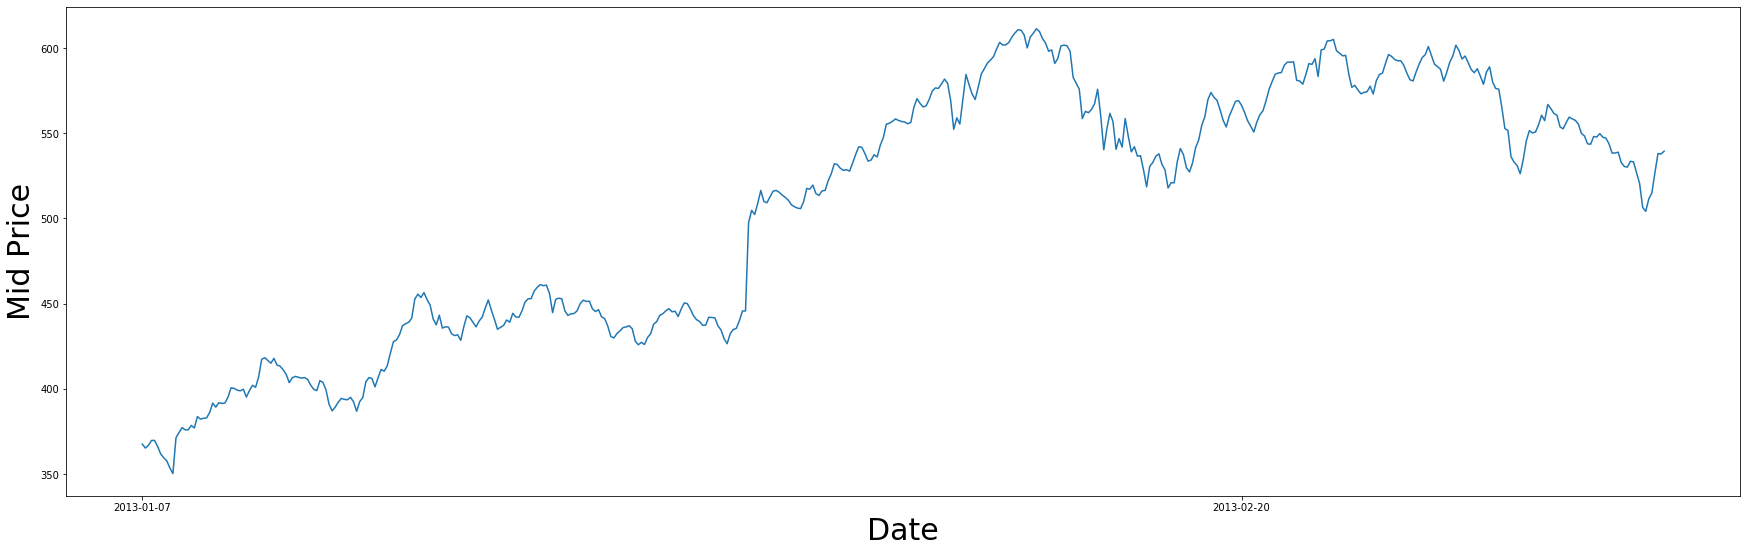

In [4]:
plt.figure(figsize = (30,9))
plt.plot(range(df.shape[0]), df['Middle'])
plt.xticks(range(0, df.shape[0], 359), df['Date'].loc[::30])
plt.xlabel('Date', fontsize=30)
plt.ylabel('Mid Price', fontsize=30)
plt.show()

In [9]:
df = df[['Open', 'High', 'Low', 'Close']]
df.head()

,Open,High,Low,Close
0,367.72,369.69,365.29,367.38
1,367.77,368.15,362.22,366.65
2,366.50,369.18,364.30,369.06
3,371.42,372.50,366.75,370.74
4,371.00,371.22,368.15,370.00


In [7]:
training_data = df[:300]
validation_data = df[300:400]
testing_data = df[400:]

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
training_data_scaled = pd.DataFrame(sc.fit_transform(training_data),
              columns=training_data.columns,
              dtype='float64')
validation_data_scaled = pd.DataFrame(sc.transform(validation_data),
              columns=validation_data.columns,
              dtype='float64')
testing_data_scaled = pd.DataFrame(sc.transform(testing_data),
              columns=testing_data.columns,
              dtype='float64')

training_data_scaled

,shares,Open,High,Low,Close,Volume,OpenInt,Middle
0,0.032107,0.058995,0.065019,0.067026,0.061630,0.084954,0.0,0.066194
1,0.000000,0.059187,0.059136,0.055288,0.058808,0.086823,0.0,0.057362
2,0.065519,0.054318,0.063071,0.063241,0.068126,0.119051,0.0,0.063320
3,0.037174,0.073178,0.075754,0.072608,0.074621,0.101548,0.0,0.074375
4,0.133728,0.071568,0.070864,0.077961,0.071760,0.050788,0.0,0.074605
...,...,...,...,...,...,...,...,...
295,0.219141,0.974393,0.972189,0.958018,0.961027,0.090454,0.0,0.967621
296,0.029149,0.938475,0.959812,0.934236,0.975139,0.113638,0.0,0.949497
297,0.069501,0.964657,0.964893,0.935306,0.939878,0.148548,0.0,0.952582
298,0.092753,0.915130,0.927379,0.911906,0.908444,0.144505,0.0,0.922042


In [17]:
import itertools

def discrete_frac_range():

        # increment : 0.01
        # fracchange : from -0.1 to 0.1, total 20 points
        # frachigh : from 0 to 0.1, total 10 points
        # fraclow : from 0 to 0.1, total 10 points

        frac_change_list = np.linspace(-0.1, 0.1, 20)
        frac_high_list = np.linspace(0, 0.1, 10)
        frac_low_list = np.linspace(0, 0.1, 10)
        
        return np.array(list(itertools.product(\
                    frac_change_list, frac_high_list, frac_low_list))) 
    
all_discrete_fracs = discrete_frac_range()
all_discrete_fracs

array([[-0.1       ,  0.        ,  0.        ],
       [-0.1       ,  0.        ,  0.01111111],
       [-0.1       ,  0.        ,  0.02222222],
       ...,
       [ 0.1       ,  0.1       ,  0.07777778],
       [ 0.1       ,  0.1       ,  0.08888889],
       [ 0.1       ,  0.1       ,  0.1       ]])

In [22]:
def fraction_calculator(data):

        open = np.array(data['Open'])
        close = np.array(data['Close'])
        high = np.array(data['High'])
        low = np.array(data['Low'])

        frac_change = (close - open) / open
        frac_high = (high - open) / open
        frac_low = (open - low) / open

        return np.column_stack((frac_change, frac_high, frac_low))

example_frac = fraction_calculator(df.head())
example_frac

array([[-0.00092462,  0.00535734,  0.00660829],
       [-0.00304538,  0.00103325,  0.01509095],
       [ 0.00698499,  0.00731241,  0.00600273],
       [-0.00183081,  0.00290776,  0.01257337],
       [-0.00269542,  0.00059299,  0.00768194]])

In [23]:
from hmmlearn.hmm import GaussianHMM

hmm = GaussianHMM(n_components=4)
frac_vector = fraction_calculator(training_data)
hmm.fit(frac_vector)

GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
            covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
            min_covar=0.001, n_components=4, n_iter=10, params='stmc',
            random_state=None, startprob_prior=1.0, tol=0.01,
            transmat_prior=1.0, verbose=False)

In [28]:
def most_likely_fracs(curr_date, hmm, all_discrete_fracs, testing_data):

        start_date = max(0, curr_date - 10)
        end_date = max(0, curr_date - 1)

        previous_data = testing_data.iloc[end_date: start_date]
        previous_fracs = fraction_calculator(previous_data)

        all_probs = []
        for one_fracs in all_discrete_fracs:
            one_outcome = np.row_stack((previous_fracs, one_fracs))
            all_probs.append(hmm.score(one_outcome))

        max_prob = all_discrete_fracs[np.argmax(all_probs)]

        return max_prob

ex_likely_frac = most_likely_fracs(20, hmm, all_discrete_fracs, testing_data)
ex_likely_frac

array([0.00526316, 0.01111111, 0.01111111])

In [42]:
def close_price(date, testing_data, most_likely_fracs, hmm, all_discrete_fracs):
                         
        open = testing_data.iloc[date]['Open']                   
        likely_frac_change, _, _ = most_likely_fracs(date, hmm, all_discrete_fracs, testing_data)     
        close = open * (1 + likely_frac_change)
        return close, (open + close) / 2

calc_close_price, calc_middle_price = close_price(20, testing_data, most_likely_fracs, hmm, all_discrete_fracs)
calc_close_price, calc_middle_price

(602.2933684210526, 600.7166842105263)

In [64]:
def closing_and_middle_price_in_range(testing_data, most_likely_fracs, hmm, all_discrete_fracs):

        # for all rows in testing data
        closing_prices = []
        middle_prices = []
        #calc_close_price, calc_middle_price = close_price(20, testing_data, most_likely_fracs, hmm, all_discrete_fracs)
        for date in range(testing_data.shape[0]):
            close, middle = close_price(date, testing_data, most_likely_fracs, hmm, all_discrete_fracs)
            closing_prices.append(close)
            middle_prices.append(middle)
        
        return closing_prices, middle_prices
        
_, mid_price = closing_and_middle_price_in_range(testing_data, most_likely_fracs, hmm, all_discrete_fracs)
mid_price

[573.5253157894737,
 580.5236842105263,
 576.5131578947369,
 577.9669736842106,
 588.2339210526316,
 588.7352368421053,
 588.645,
 597.1573421052632,
 598.5209210526316,
 596.4655263157895,
 594.8312368421052,
 596.3351842105262,
 593.5578947368422,
 589.3568684210526,
 581.5463684210526,
 583.732105263158,
 584.4840789473685,
 593.2871842105263,
 593.1568421052632,
 596.6961315789474,
 600.7166842105263,
 601.578947368421,
 593.2972105263158,
 591.5526315789474,
 591.9436578947368,
 583.7722105263158,
 582.4788157894737,
 591.0613421052632,
 596.6159210526316,
 601.0676052631579,
 604.5367105263158,
 596.5657894736842,
 593.1267631578949,
 598.5610263157895,
 587.4719210526316,
 583.3611315789474,
 589.0360263157895,
 588.3442105263157,
 579.7316052631579,
 585.637105263158,
 591.5025,
 586.4392105263157,
 576.7237105263158,
 583.1405526315789,
 569.193947368421,
 556.5908684210526,
 551.5877368421052,
 543.5065263157895,
 528.3868421052632,
 541.8722368421054,
 521.8196052631579,
 53